# 一些实用工具

## 1. Tensorboard
　　Tensorboard是tensorflow框架的高级的可视化的工具，github上有人提供了Pytorch使用它的方案TensorboardX．

## 1.1 安装 

安装TensorboardX的命令：

pip install tensorboardX

pip install tensorflow

## 1.2 用Tensorboard画网络结构图

用add_graph()画出vgg16的网络结构图：

In [1]:
import torch
from torchvision import models
from tensorboardX import SummaryWriter

# 定义网络
vgg16 = models.resnet18()
# 定义网络输入
dummy_input = torch.rand(4, 3, 224, 224)
# 画图
with SummaryWriter(comment='resnet18') as w:
    w.add_graph(vgg16, (dummy_input,))

执行完代码，会生成runs文件夹。
在同一文件夹下，用终端运行命令：

tensorboard --logdir runs
![add_graph](./add_graph.png)

点击连接即可查看网络结构图：
![graph](./graph.png)


# 1.3 用Tensorboard画loss曲线

用add_scalar()画单条曲线;用add_scalars()画多条曲线。

In [2]:
import numpy as np
from tensorboardX import SummaryWriter

writer = SummaryWriter()

for epoch in range(100):
    writer.add_scalar('scalar/test', np.random.rand(), epoch)
    writer.add_scalars('scalar/scalars_test', {'xsinx': epoch*np.sin(epoch), 'xcosx': epoch*np.cos(epoch)}, epoch)

writer.close()


同样用tensorboard --logdir runs 查看结果。

# 2. 混淆矩阵

　　混淆矩阵也叫误差矩阵。在机器学习中, 常用来可视化地评估监督学习算法的性能。混淆矩阵大小为 (n_classes, n_classes) 的方阵, 其中 n_classes表示类的数量。混淆矩阵的每一列代表了预测类别，每一列的总数表示预测为该类别的数据的数目；每一行代表了数据的真实归属类别，每一行的数据总数表示该类别的数据实例的数目。矩阵对角线的数值越高则说明训练出的模型越好。

In [7]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # 混淆矩阵

def plot_confusion_matrix(num_classes, true_labels, pred_labels, 
                          path="./confusion_matrix.png"):
    """
    画混淆矩阵。
    Args:
        num_classes: 类别数量。
        true_labels: 真实标签。
        pred_labels: 预测出的结果。
        path: 混淆矩阵热力图保存路径。
    """
    labels = range(num_classes)
    cm = confusion_matrix(true_labels, pred_labels, labels)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix', fontsize = 18)
    plt.show()
    plt.savefig(path)
    plt.close()

测试代码：

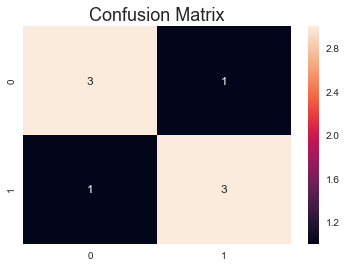

In [8]:
true_labels=[0, 1, 0, 1, 1, 0, 1, 0]
pred_labels=[1, 1, 0, 1, 0, 0, 1, 0]
plot_confusion_matrix(2, true_labels, pred_labels)